    Exercise Sheet Week 4

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm

# Task 2

In [130]:
data = pd.read_csv('faithful.dat', delimiter = '\s+', skiprows=25)
erup = data['eruptions'].to_numpy()

In [136]:
def EM(random_seed, num_components, num_interations, data):
    # Initialize parameters randomly
    np.random.seed(random_seed)
    mu = np.random.rand(num_components) * data.max()
    sigma = np.random.rand(num_components) * data.std()
    pi = np.ones(num_components) / num_components
        
    
    # EM Algorithm
    iterations = num_interations
    for iteration in range(iterations):
        # E-step: Calculate the responsibilities
        responsibilities = np.zeros((len(data), num_components))
        for k in range(num_components):
            responsibilities[:, k] = pi[k] * norm.pdf(data, loc=mu[k], scale=sigma[k])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # M-step: Update parameters
        Nk = np.sum(responsibilities, axis=0)
        pi = Nk / len(data)
        mu = np.sum(data[:, np.newaxis] * responsibilities, axis=0) / Nk
        sigma = np.sqrt(np.sum(responsibilities * (data[:, np.newaxis] - mu) ** 2, axis=0) / Nk)

    # Print the learned parameters
    print("Learned Parameters:")
    for k in range(num_components):
        print(f"Component {k + 1}:")
        print(f"  Mean (mu): {mu[k]:.4f}")
        print(f"  Standard Deviation (sigma): {sigma[k]:.4f}")
        print(f"  Weight (pi): {pi[k]:.4f}")
        print()

    # Create a histogram
    plt.hist(data, bins=20, density=True, alpha=0.6, label="Histogram")

    # Plot the estimated GMM PDF
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = np.zeros_like(x)
    for k in range(num_components):
        pdf += pi[k] * norm.pdf(x, loc=mu[k], scale=sigma[k])
    plt.plot(x, pdf, 'r-', label="GMM PDF")

    plt.xlabel("Eruption Duration")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.title("Histogram and GMM Fit");


Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



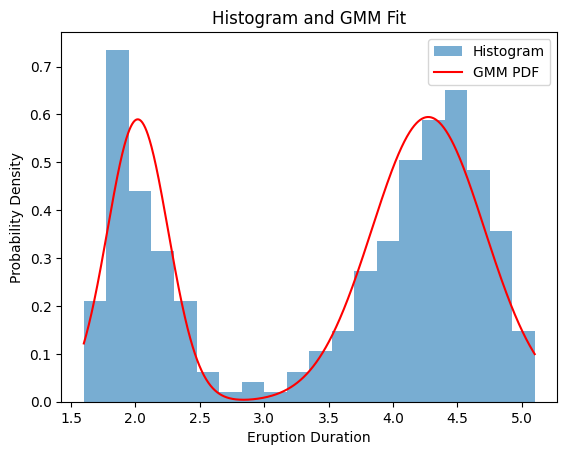

In [137]:
EM(random_seed = 0, num_components=2, num_interations=100, data=erup)

Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



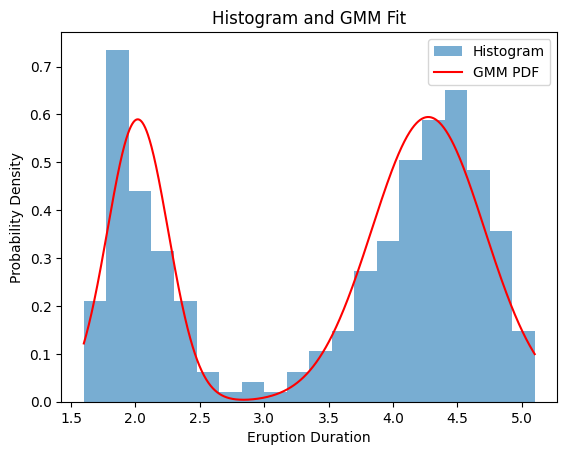

In [138]:
EM(random_seed = 42, num_components=2, num_interations=100, data=erup)

Learned Parameters:
Component 1:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516

Component 2:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484



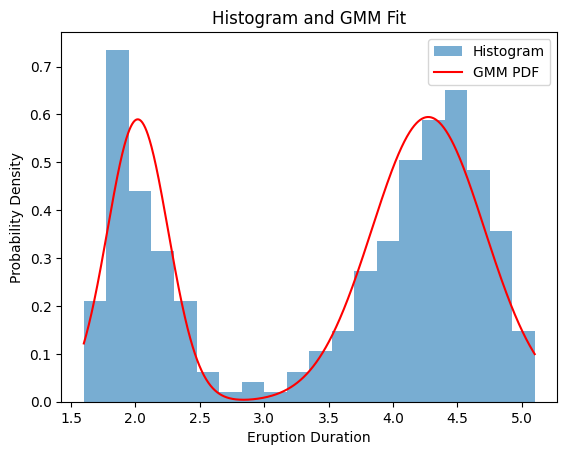

In [139]:
EM(random_seed = 13, num_components=2, num_interations=100, data=erup)

Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



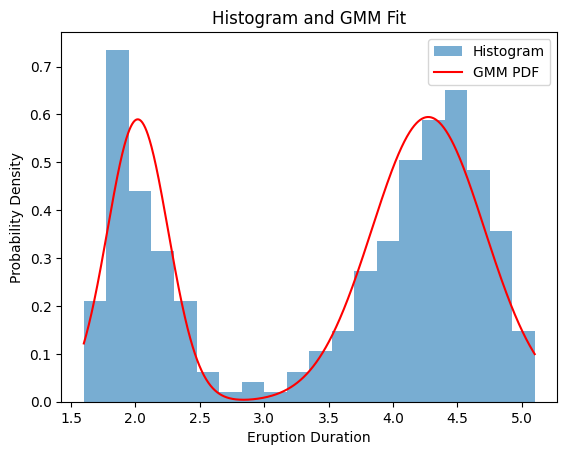

In [140]:
EM(random_seed = 823, num_components=2, num_interations=100, data=erup)

# Task 3

In [101]:
#defining data
X = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
t = np.array([0.15, -0.16, -0.61, -0.86, -1.02, -0.44, 0.16, 0.05, 0.45, 1.39, 0.86])

## 3.a

In [102]:
#normalize data
normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
normalizer.adapt(X)

In [103]:
#build the model
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [104]:
#configure training procedure
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [105]:
#fit the model
history = model.fit(
    X,
    t,
    epochs=100,
    # Suppress logging
    verbose=0)

In [106]:
# predict target variable
y = model.predict(X)

1/1 [==============================] - 0s 137ms/step


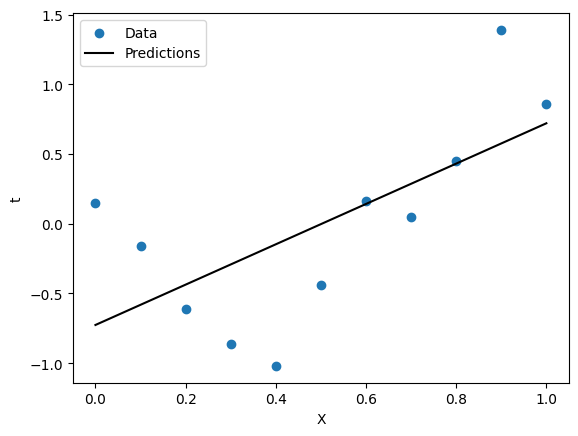

In [108]:
#plotting raw data and estimated model
plt.scatter(X, t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();

## 3.b

In [117]:
# Create the MLP model
model = keras.Sequential([
    layers.Input(shape=(1,)),   
    # Hidden layer with 10 neurons and tanh activation            
    layers.Dense(10, activation='tanh'),  
    # Output layer with linear activation  
    layers.Dense(1, activation='linear')    
])

In [118]:
#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [119]:
# Fit the model and allow to overfit
history = model.fit(
    X, 
    t, 
    epochs=10000, 
    verbose=0)

In [120]:
#predict target
y = model.predict(X)

1/1 [==============================] - 0s 66ms/step


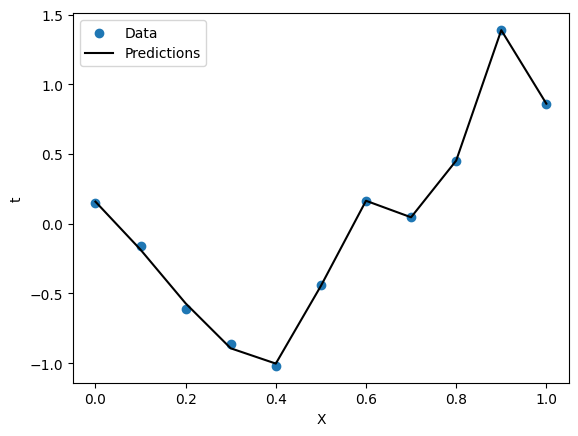

In [121]:
#plotting raw data and estimated model
plt.scatter(X, t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();